In [10]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [11]:
# Chemin du fichier Excel
file_path = "extract_destinaire_avec_donnees2.xlsx"

# Lecture du fichier Excel
data = pd.read_excel(file_path)

# Affichage des premières lignes pour vérification
print(data.head())


     DESTINATAIRE  N° B.C  N° B.L                                  MARKETER  \
0  bps togblekope   66397   61442  COLIENERGY SA                              
1  bps togblekope   66761   61824  BABATI PETROLEUM SERVICES                  
2  bps togblekope   66762   61825  BABATI PETROLEUM SERVICES                  
3  bps togblekope   66987   62044  BABATI PETROLEUM SERVICES                  
4  bps togblekope   67415   62432  BABATI PETROLEUM SERVICES                  

               N° B.E.C                                   PRODUIT       DATE  \
0  086/01/2020           GASOIL                                   2020-01-15   
1                    56  SUPER                                    2020-01-17   
2                    56  GASOIL                                   2020-01-17   
3                    57  GASOIL                                   2020-01-18   
4                    60  SUPER                                    2020-01-21   

                               TRANSPORTEUR 

C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_24792\2336189068.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_24792\2336189068.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_data['Mois'] = super_data['DATE'].dt.to_period('M')


<Figure size 1200x600 with 0 Axes>

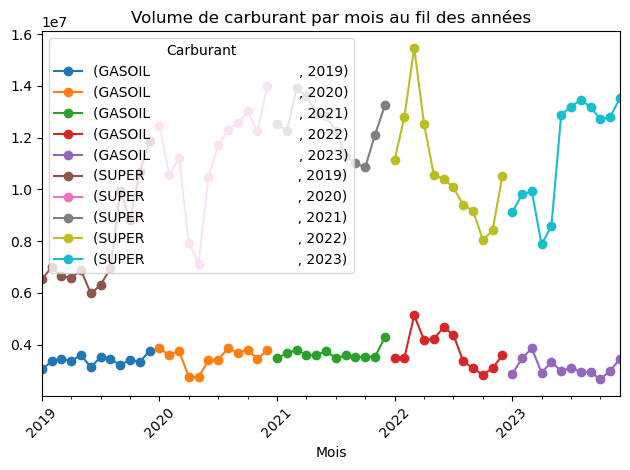

In [12]:
# Filtrer les données pour inclure uniquement les produits "GASOIL" et "SUPER" en tenant compte des espaces supplémentaires
gasoil_data = data[data['PRODUIT'].str.strip() == 'GASOIL']
super_data = data[data['PRODUIT'].str.strip() == 'SUPER']

# Créer une colonne 'Mois' pour regrouper les données par mois
gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
super_data['Mois'] = super_data['DATE'].dt.to_period('M')

# Combiner les données des deux carburants en regroupant par mois et année
combined_data = pd.concat([gasoil_data, super_data])
grouped_data = combined_data.groupby(['Mois', combined_data['DATE'].dt.year, 'PRODUIT'])['VOLUME'].sum().unstack().unstack()

# Limiter les données jusqu'en 2023
grouped_data = grouped_data.loc[grouped_data.index.get_level_values('Mois').year <= 2023]

# Vérifier si les données sont vides avant de tracer le graphique
if not grouped_data.empty:
    # Tracer le graphique combiné
    plt.figure(figsize=(12, 6))
    grouped_data.plot(marker='o', linestyle='-')
    plt.title('Volume de carburant par mois au fil des années')
    plt.xlabel('Mois')
    #plt.ylabel('Volume de carburant')
    plt.legend(title='Carburant')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Aucune donnée disponible pour tracer le graphique.")


C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_24792\3763930701.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_24792\3763930701.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_data['Mois'] = super_data['DATE'].dt.to_period('M')


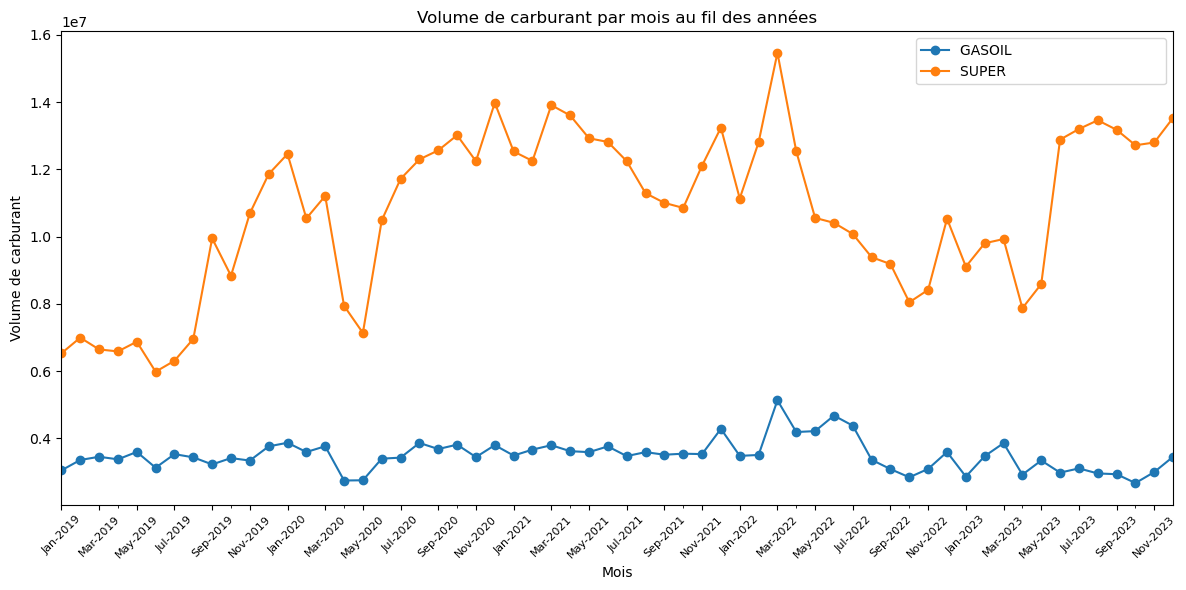

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import MonthLocator, DateFormatter

# Filtrer les données pour inclure uniquement les produits "GASOIL" et "SUPER" en tenant compte des espaces supplémentaires
gasoil_data = data[data['PRODUIT'].str.strip() == 'GASOIL']
super_data = data[data['PRODUIT'].str.strip() == 'SUPER']

# Créer une colonne 'Mois' pour regrouper les données par mois pour le gasoil
gasoil_data['Mois'] = gasoil_data['DATE'].dt.to_period('M')
# Créer une colonne 'Mois' pour regrouper les données par mois pour le super
super_data['Mois'] = super_data['DATE'].dt.to_period('M')

# Combiner les données des deux carburants en regroupant par mois et année
combined_data = pd.concat([gasoil_data, super_data])

# Utiliser pivot_table pour réorganiser les données
pivot_data = combined_data.pivot_table(index='Mois', columns='PRODUIT', values='VOLUME', aggfunc='sum')

# Limiter les données jusqu'en 2023
pivot_data = pivot_data[pivot_data.index.year <= 2023]

# Vérifier si les données sont vides avant de tracer le graphique
if not pivot_data.empty:
    # Tracer le graphique combiné
    plt.figure(figsize=(12, 6))
    # Tracer les données avec des couleurs distinctes
    pivot_data.plot(marker='o', linestyle='-', ax=plt.gca())
    # Définir le titre du graphique
    plt.title('Volume de carburant par mois au fil des années')
    # Définir le label de l'axe x
    plt.xlabel('Mois')
    # Définir le label de l'axe y
    plt.ylabel('Volume de carburant')
    # Faire pivoter les labels de l'axe x de 45 degrés pour une meilleure lisibilité
    plt.xticks(rotation=45)
    
    # Filtrer les dates pour n'afficher que celles après 2019
    filtered_dates = pivot_data.index.year >= 2019
    filtered_dates = pivot_data.index[filtered_dates]
    # Afficher un mois sur deux en ajustant le MonthLocator
    plt.gca().xaxis.set_major_locator(MonthLocator(interval=2))
    plt.xticks(ticks=filtered_dates[::2], labels=filtered_dates[::2].strftime('%b-%Y'), fontsize=8)  # Réduire la taille de la police et afficher un mois sur deux
    
    # Afficher la légende
    plt.legend()
    # Ajuster la disposition du graphique pour s'assurer que tout est visible
    plt.tight_layout()
    # Afficher le graphique
    plt.show()
else:
    # Afficher un message si aucune donnée n'est disponible pour tracer le graphique
    print("Aucune donnée disponible pour tracer le graphique.")


In [18]:
import pandas as pd

# Charger le fichier Excel en spécifiant que les noms de colonnes peuvent contenir des espaces
df = pd.read_excel('extract_destinaire_avec_donnees2.xlsx')

# Convertir le format de la colonne 'DATE' en datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Filtrer les données pour la période du 1er juillet 2023 au 30 novembre 2023
start_date = '2023-07-01'
end_date = '2023-11-30'
filtered_df = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]

# Convertir les noms de produits en minuscules pour uniformiser
filtered_df['PRODUIT'] = filtered_df['PRODUIT'].str.lower()

# Filtrer les données pour les produits 'gasoil' et 'super'
filtered_products = filtered_df[filtered_df['PRODUIT'].isin(['gasoil', 'super'])]

# Calculer la moyenne du volume de carburant
average_volume = filtered_products['VOLUME'].mean()

print("La moyenne du volume de carburant pour les produits gasoil et super du 1er juillet 2023 au 30 novembre 2023 est :", average_volume)


La moyenne du volume de carburant pour les produits gasoil et super du 1er juillet 2023 au 30 novembre 2023 est : nan


C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_24792\3290849309.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['PRODUIT'] = filtered_df['PRODUIT'].str.lower()


In [21]:
import pandas as pd

# Charger le fichier Excel en spécifiant que les noms de colonnes peuvent contenir des espaces
df = pd.read_excel('extract_destinaire_avec_donnees2.xlsx')

# Convertir le format de la colonne 'DATE' en datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Filtrer les données pour la période du 1er juillet 2023 au 30 novembre 2023
start_date = '2023-07-01'
end_date = '2023-11-30'
filtered_df = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]

# Convertir les noms de produits en minuscules pour uniformiser
filtered_df['PRODUIT'] = filtered_df['PRODUIT'].str.lower()

# Filtrer les données pour les produits 'gasoil' et 'super'
filtered_products = filtered_df[filtered_df['PRODUIT'].isin(['gasoil', 'super'])]

# Vérifier s'il y a des valeurs "nan" dans la colonne 'VOLUME' et les remplacer par zéro
filtered_products['VOLUME'] = filtered_products['VOLUME'].fillna(0)

# Afficher les données filtrées après le remplacement des valeurs "nan"
print(filtered_products)

# Calculer la moyenne du volume de carburant
average_volume = filtered_products['VOLUME'].mean()

print("La moyenne du volume de carburant pour les produits gasoil et super du 1er juillet 2023 au 30 novembre 2023 est :", average_volume)


Empty DataFrame
Columns: [DESTINATAIRE, N° B.C, N° B.L, MARKETER, N° B.E.C, PRODUIT, DATE, TRANSPORTEUR, TRACTEUR, CITERNE, ZONE, TYPE DOUANE, VOLUME]
Index: []
La moyenne du volume de carburant pour les produits gasoil et super du 1er juillet 2023 au 30 novembre 2023 est : nan


C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_24792\298619100.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['PRODUIT'] = filtered_df['PRODUIT'].str.lower()


In [22]:
import pandas as pd

# Charger le fichier Excel en spécifiant que les noms de colonnes peuvent contenir des espaces
df = pd.read_excel('extract_destinaire_avec_donnees2.xlsx')

# Convertir le format de la colonne 'DATE' en datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Filtrer les données pour la période du 1er juillet 2023 au 30 novembre 2023
start_date = '2023-07-01'
end_date = '2023-11-30'
filtered_df = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]

# Convertir les noms de produits en minuscules pour uniformiser
filtered_df['PRODUIT'] = filtered_df['PRODUIT'].str.lower()

# Filtrer les données pour les produits 'gasoil' et 'super'
filtered_products = filtered_df[filtered_df['PRODUIT'].isin(['gasoil', 'super'])]

# Afficher les données filtrées
print(filtered_products)


Empty DataFrame
Columns: [DESTINATAIRE, N° B.C, N° B.L, MARKETER, N° B.E.C, PRODUIT, DATE, TRANSPORTEUR, TRACTEUR, CITERNE, ZONE, TYPE DOUANE, VOLUME]
Index: []


C:\Users\MM_DATA\AppData\Local\Temp\ipykernel_24792\1108068968.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['PRODUIT'] = filtered_df['PRODUIT'].str.lower()


In [23]:
print(df['VOLUME'].dtype)


int64


In [24]:
filtered_products['VOLUME'] = filtered_products['VOLUME'].fillna(0)


In [25]:
try:
  filtered_products['VOLUME'] = pd.to_numeric(filtered_products['VOLUME'])
except:
  pass


In [26]:
average_volume = filtered_products['VOLUME'].mean()
print("La moyenne du volume de carburant pour les produits gasoil et super du 1er juillet 2023 au 30 novembre 2023 est :", average_volume)


La moyenne du volume de carburant pour les produits gasoil et super du 1er juillet 2023 au 30 novembre 2023 est : nan


In [27]:
filtered_products['VOLUME'].describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: VOLUME, dtype: float64

In [28]:
filtered_products_without_nan = filtered_products.dropna(subset=['VOLUME'])


In [29]:
average_volume = filtered_products_without_nan['VOLUME'].mean()
print("La moyenne du volume de carburant pour les produits gasoil et super du 1er juillet 2023 au 30 novembre 2023 est :", average_volume)


La moyenne du volume de carburant pour les produits gasoil et super du 1er juillet 2023 au 30 novembre 2023 est : nan
